# Gradient descent algorithm with numpy 

prediction before training:  0
epoch 1 | w = 1.800 | loss = 67.50000000 |
epoch 2 | w = 2.520 | loss = 10.80000000 |
epoch 3 | w = 2.808 | loss = 1.72800000 |
epoch 4 | w = 2.923 | loss = 0.27648000 |
epoch 5 | w = 2.969 | loss = 0.04423680 |
epoch 6 | w = 2.988 | loss = 0.00707789 |
epoch 7 | w = 2.995 | loss = 0.00113246 |
epoch 8 | w = 2.998 | loss = 0.00018119 |
epoch 9 | w = 2.999 | loss = 0.00002899 |
epoch 10 | w = 3.000 | loss = 0.00000464 |
prediction after training:  14.998427136


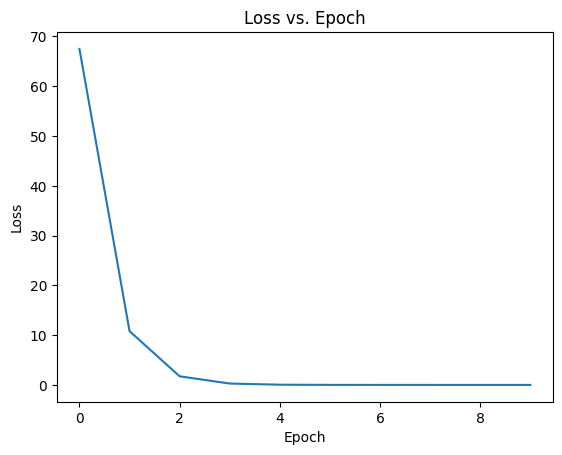

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# our optimal weiht for the linear regression is 3:

# so we first set up our train dataset 
X = np.array([1,2,3,4])
Y = np.array([3,6,9,12])

# the linear function looks like this: 
# y_pred = w * x

# initlize the weight with a random number
w = 0

# create function for forward pass
def forward(x):
    return w * x # returns y_pred

# create function for loss
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

# create function for gradient (derivative of loss in respect to w)
def gradient(x, y, y_pred):
    return np.dot(2*x, y_pred-y).mean() # dj / dw

# get predictions before training with x = 5
print("prediction before training: ", forward(5))

# define learning_rate and epoch
learning_rate = 0.01
epoch = 10

# create empty list for plotting the loss over the epochs
loss_list = []

for epoch in range(epoch):

    # get predictions
    y_pred = forward(X)
    
    # calculate loss
    l = loss(Y, y_pred)
    loss_list.append(l)
    
    # calculate gradients
    dj_dw = gradient(X, Y, y_pred)
    
    # update weights
    w -= learning_rate * dj_dw
    
    if epoch % 1 == 0:
        print(f'epoch {epoch+1} | w = {w:.3f} | loss = {l:.8f} |')

# get predictions after training with x = 5
print("prediction after training: ", forward(5))

# plot the loss over the epochs
plt.plot(loss_list)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs. Epoch")
plt.show()


# Gradient Descent Algorithm with PyTorch 

prediction before training:  tensor(0., grad_fn=<MulBackward0>)
epoch 1 | w = 0.450 | loss = 67.50000000 |
epoch 2 | w = 0.832 | loss = 48.76874924 |
epoch 3 | w = 1.158 | loss = 35.23542023 |
epoch 4 | w = 1.434 | loss = 25.45759392 |
epoch 5 | w = 1.669 | loss = 18.39311218 |
epoch 6 | w = 1.869 | loss = 13.28902245 |
epoch 7 | w = 2.038 | loss = 9.60131741 |
epoch 8 | w = 2.183 | loss = 6.93695211 |
epoch 9 | w = 2.305 | loss = 5.01194763 |
epoch 10 | w = 2.409 | loss = 3.62113094 |
epoch 11 | w = 2.498 | loss = 2.61626792 |
epoch 12 | w = 2.573 | loss = 1.89025354 |
epoch 13 | w = 2.637 | loss = 1.36570740 |
epoch 14 | w = 2.692 | loss = 0.98672402 |
epoch 15 | w = 2.738 | loss = 0.71290839 |
epoch 16 | w = 2.777 | loss = 0.51507670 |
epoch 17 | w = 2.811 | loss = 0.37214261 |
epoch 18 | w = 2.839 | loss = 0.26887321 |
epoch 19 | w = 2.863 | loss = 0.19426075 |
epoch 20 | w = 2.884 | loss = 0.14035338 |
prediction after training:  tensor(14.4186, grad_fn=<MulBackward0>)
prediction 

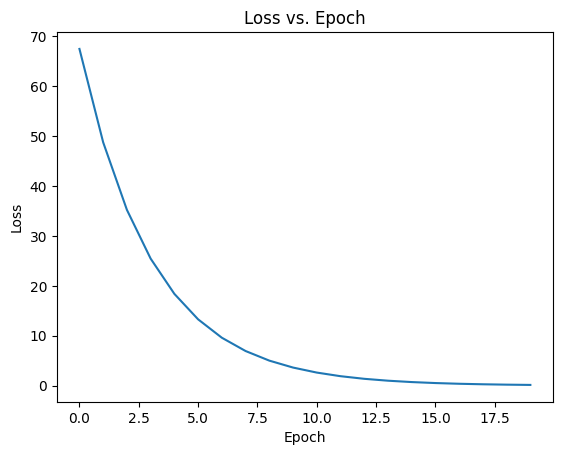

In [65]:
import torch
import matplotlib.pyplot as plt

# our optimal weiht for the linear regression is 3:

# so we first set up our train dataset (# numpy array in torch.tensor uwandeln)
X = torch.tensor([1,2,3,4])
Y = torch.tensor([3,6,9,12])

# the linear function looks like this: 
# y_pred = w * x

# initlize the weight with a random number
w = torch.tensor(0.0, requires_grad=True) # (w ebenfalls in Torch tensor umwandeln und requires_grad=True setzen (weil wir nach w ableiten wollen!))

# create function for forward pass
def forward(x):
    return w * x # returns y_pred

# create function for loss
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

# get predictions before training with x = 5
print("prediction before training: ", forward(5))

# define learning_rate and epoch
learning_rate = 0.01
epoch = 20

# create empty list for plotting the loss over the epochs
loss_list = []

for epoch in range(epoch):

    # get predictions
    y_pred = forward(X)
    
    # calculate loss
    l = loss(Y, y_pred)
    loss_list.append(l.item())
    
    # calculate gradients -> backward pass mit pytorch backwards methode berechnen
    l.backward() # calculates the gradient dj / dw
    
    # update weights
    with torch.no_grad(): # torch.no_grad() -> torch soll nicht die gradienten berechnen, da wir diese ja schon berechnet haben
        w -= learning_rate * w.grad 
    
    # zero gradients (Ansonsten summieren sich die gradienten wieder auf und es kommt zu einem Fehler)
    w.grad.zero_()

    if epoch % 1 == 0:
        print(f'epoch {epoch+1} | w = {w:.3f} | loss = {l:.8f} |')

# get predictions after training with x = 5
print("prediction after training: ", forward(5))

# get predictions after training with x = 5
print("prediction after training: ", forward(5))

# plot the loss over the epochs
plt.plot(loss_list)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs. Epoch")
plt.show()


# Warum sehen beide Grafiken (Loss vs. Epch) bei PyTorch und Numpy unterschiedlich aus? 
Antwort: Numpy nutzt ein numerisches verfahren, um den Gradienten zu berechnen. PyTorch hingegen nutzt einen anderen Ansatz. 